In [26]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_path = '/content/drive/MyDrive/CVPR/animals/animals'

In [4]:
catagories = os.listdir(data_path)
print(catagories)

['dogs', 'cats', 'panda']


In [5]:
train_data = []

for c in catagories:
    path = os.path.join(data_path, c)
    label = catagories.index(c)
    for img in os.listdir(path):
        try:
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            img_arr = cv2.resize(img_arr, (32, 32))
            train_data.append([img_arr, label])
        except Exception as e:
            pass

print(len(train_data))


3000


In [6]:
import random
random.shuffle(train_data)

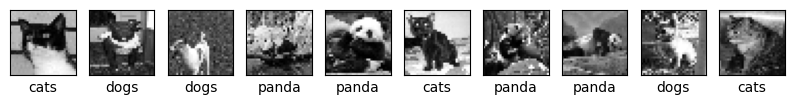

In [7]:
plt.figure(figsize=(10,3))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(train_data[i][0], cmap='gray')
  plt.xlabel(catagories[train_data[i][1]])
  plt.xticks([])
  plt.yticks([])
plt.show()

In [8]:
# Create folds
f1 = train_data[0:600]
f2 = train_data[600:1200]
f3 = train_data[1200:1800]
f4 = train_data[1800:2400]
f5 = train_data[2400:3000]
print(len(f1), len(f2), len(f3), len(f4), len(f5))

train_set= f1+f2+f3+f4
validation_set = f5
print(len(train_set),len(validation_set))


600 600 600 600 600
2400 600


In [9]:
# get image and labels from the train and validation sets
X_train = np.array([x[0].flatten() for x in train_set])  # Flatten the 32x32 image into a 1D vector
y_train = np.array([x[1] for x in train_set]) # Get the labels of the training set

X_val = np.array([x[0].flatten() for x in validation_set])
y_val = np.array([x[1] for x in validation_set])

In [10]:
# Manhattan (L1) distance function
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

# Euclidean (L2) distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [11]:
# k-NN classifier function
def knn_predict(X_train, y_train, X_test, k, distance_fn):
    predictions = []
    for test_sample in X_test:
        distances = [distance_fn(train_sample, test_sample) for train_sample in X_train]

        # Get the indices of the k nearest neighbors
        k_nearest_indices = np.argsort(distances)[:k]

        # Get the labels of the k nearest neighbors
        k_nearest_labels = [y_train[i] for i in k_nearest_indices]

        # Predict the majority label (vote)
        predicted_label = max(set(k_nearest_labels), key=k_nearest_labels.count)
        predictions.append(predicted_label) # Append the predicted label to the predictions list
    return np.array(predictions)

In [12]:
def calculate_accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true) # Return the percentage of correct predictions

# Define a range of k values to evaluate
k_values = range(1, 21)
accuracies_manhattan = []
accuracies_euclidean = []

In [14]:
# Loop through each k value and compute accuracy
print('Manhattan Distance:')
for k in k_values:
    y_pred_manhattan = knn_predict(X_train, y_train, X_val, k, manhattan_distance)
    accuracy_manhattan = calculate_accuracy(y_val, y_pred_manhattan)
    accuracies_manhattan.append(accuracy_manhattan)
    print(f'Accuracy for k={k}:', accuracy_manhattan)



Manhattan Distance:
Accuracy for k=1: 0.385
Accuracy for k=2: 0.34
Accuracy for k=3: 0.3616666666666667
Accuracy for k=4: 0.36333333333333334
Accuracy for k=5: 0.335
Accuracy for k=6: 0.3433333333333333
Accuracy for k=7: 0.33666666666666667
Accuracy for k=8: 0.34
Accuracy for k=9: 0.3433333333333333
Accuracy for k=10: 0.3383333333333333
Accuracy for k=11: 0.34
Accuracy for k=12: 0.34833333333333333
Accuracy for k=13: 0.35
Accuracy for k=14: 0.3466666666666667
Accuracy for k=15: 0.345
Accuracy for k=16: 0.33666666666666667
Accuracy for k=17: 0.3333333333333333
Accuracy for k=18: 0.36
Accuracy for k=19: 0.35833333333333334
Accuracy for k=20: 0.36666666666666664


In [15]:
accuracies_euclidean = []

print('Euclidean Distance:')
for k in k_values:
    y_pred_euclidean = knn_predict(X_train, y_train, X_val, k, euclidean_distance)
    accuracy_euclidean = calculate_accuracy(y_val, y_pred_euclidean)
    accuracies_euclidean.append(accuracy_euclidean)
    print(f'Accuracy for k={k}:', accuracy_euclidean)


Euclidean Distance:
Accuracy for k=1: 0.4066666666666667
Accuracy for k=2: 0.36833333333333335
Accuracy for k=3: 0.43333333333333335
Accuracy for k=4: 0.4
Accuracy for k=5: 0.4083333333333333
Accuracy for k=6: 0.44666666666666666
Accuracy for k=7: 0.435
Accuracy for k=8: 0.44166666666666665
Accuracy for k=9: 0.44166666666666665
Accuracy for k=10: 0.44333333333333336
Accuracy for k=11: 0.44
Accuracy for k=12: 0.4683333333333333
Accuracy for k=13: 0.4716666666666667
Accuracy for k=14: 0.47333333333333333
Accuracy for k=15: 0.4816666666666667
Accuracy for k=16: 0.4866666666666667
Accuracy for k=17: 0.48
Accuracy for k=18: 0.48
Accuracy for k=19: 0.48333333333333334
Accuracy for k=20: 0.48333333333333334


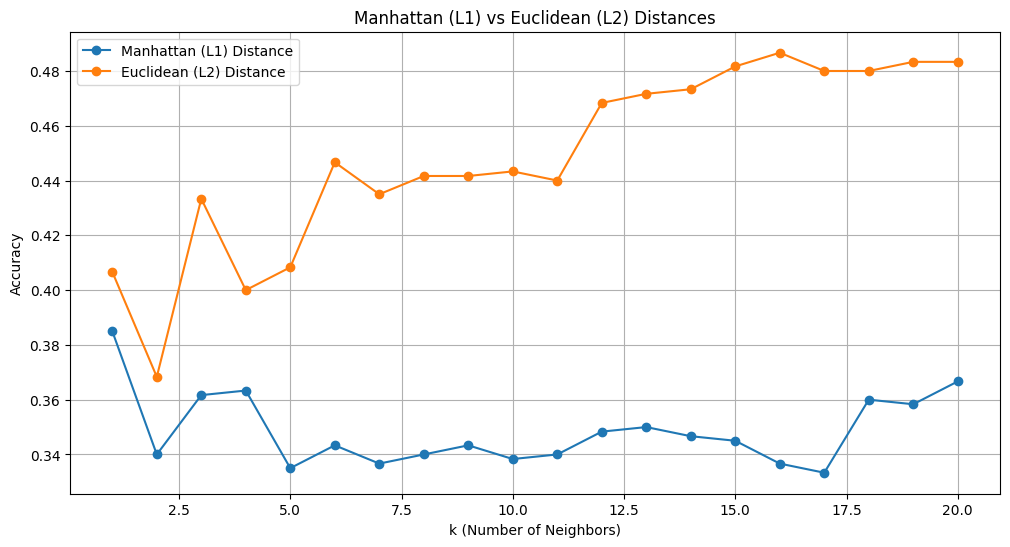

In [23]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies_manhattan, label='Manhattan (L1) Distance', marker='o')
plt.plot(k_values, accuracies_euclidean, label='Euclidean (L2) Distance', marker='o')
plt.xlabel('k (Number of Neighbors)')  # Set the x-axis label
plt.ylabel('Accuracy') # Set the y-axis label
plt.title('Manhattan (L1) vs Euclidean (L2) Distances')
plt.legend()
plt.grid(True)
plt.show()

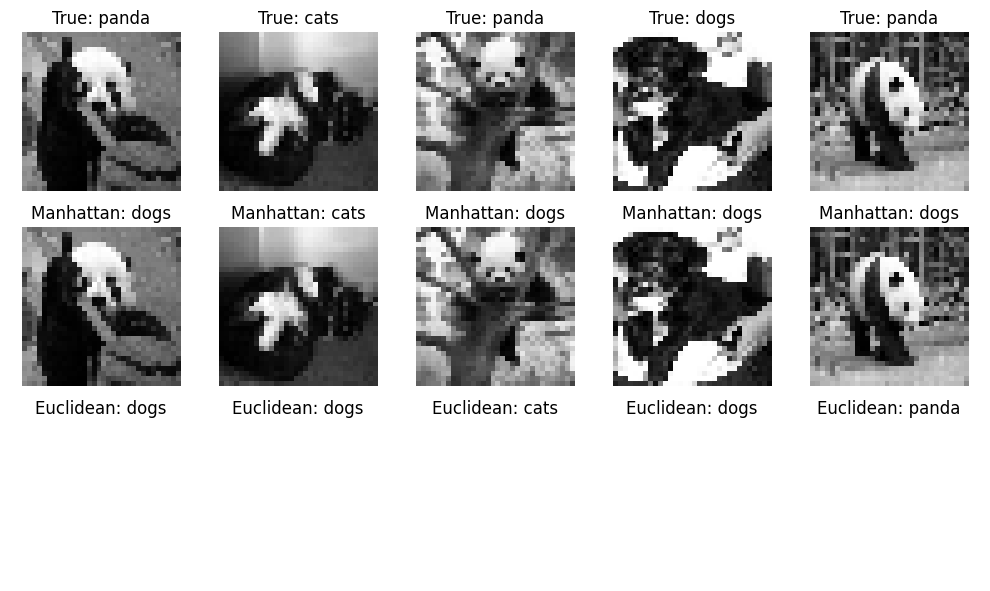

In [25]:
test_images = X_val[:5]
true_labels = y_val[:5]

k = 5

# Predict labels using both Manhattan and Euclidean distances
pred_manhattan = knn_predict(X_train, y_train, test_images, k, manhattan_distance)
pred_euclidean = knn_predict(X_train, y_train, test_images, k, euclidean_distance)

# Plot the test images along with their true and predicted labels
plt.figure(figsize=(10, 6))

for i in range(5):
    # Show the test image with true label
    plt.subplot(3, 5, i + 1)
    img = test_images[i].reshape(32, 32)
    plt.imshow(img, cmap='gray')
    plt.title(f'True: {catagories[true_labels[i]]}')
    plt.axis('off')

    # Show the predicted label using Manhattan distance
    plt.subplot(3, 5, i + 6)
    plt.imshow(img, cmap='gray')
    plt.title(f'Manhattan: {catagories[pred_manhattan[i]]}')
    plt.axis('off')

    # Show the predicted label using Euclidean distance
    plt.subplot(3, 5, i + 11)
    plt.title(f'Euclidean: {catagories[pred_euclidean[i]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()